### Parts
- [K-Mean clustering Class](#1)
- [Loading the dataset](#2)
- [Model fit](#3)
- [Generated centoids](#4)
- [Model test](#5)
- [Result Visualization](#6)
- [Accuracy](#7)

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

### 1. K-Mean clustering Class 
<a id='1'></a>

In [2]:
class KMeans:
    """
    K-means clustering
    """
    
    def __init__(self, n_clusters):
        """
        Constructor
        """
        self.k = n_clusters
        self.clusters = None
        self.data_len = None
        self.tr_threshold = 0.001
        self.previous_centroids = None
        np.random.seed(23)

    def fit(self, X):
        """
        Generating the clusters
        """
        
        self.clusters = {i: {'centroid': 2*(2*np.random.random((X.shape[1],))-1),
                             'elements': []} for i in range(self.k)}
        self.data_len = X.shape[0]
        
        difference = float('inf')
        while difference > self.tr_threshold:
            self.add_clusters_values()
            self.reset_clusters()
            
            current_centroids = np.array([self.clusters[i]['centroid'] for i in range(self.k)])
            if self.previous_centroids is not None:
                difference = np.mean(np.abs(current_centroids-self.previous_centroids))
            self.previous_centroids = current_centroids
        
    def euclidean_distance(self, p1,p2):
        """
        To find euclidean_distance
        between two points
        """
        
        return np.sqrt(np.sum((p1-p2)**2))
    
    def add_clusters_values(self):
        """
        Add the elements to the cluster
        dict according to the euclidean 
        distances
        """
        
        for idx in range(self.data_len):
            element = X[idx]
            min_distance_cluster = np.argmin([self.euclidean_distance(element, self.clusters[i]['centroid']) for i in range(self.k)])
            self.clusters[min_distance_cluster]['elements'].append(element)
    
    def reset_clusters(self):
        """
        Reseets the element list for the
        next iteration
        """
        
        for i in range(self.k):
            elements = np.array(self.clusters[i]['elements'])
            if elements.shape[0] > 0:
                new_center = elements.mean(axis=0)
                self.clusters[i]['centroid'] = new_center
                self.clusters[i]['elements'] = []
                
    def predict(self, X):
        """
        To predict the input sample
        """
        
        pred = []
        for i in range(X.shape[0]):
            predicted_cluster = np.argmin([self.euclidean_distance(X[i], self.clusters[j]['centroid']) for j in range(self.k)])
            pred.append(predicted_cluster)
        return np.array(pred)
    
    @property
    def cluster_centroids(self):
        """
        To return the generated 
        centroid coordinates
        """
        
        return np.array([self.clusters[i]["centroid"] for i in range(self.k)])

### 2. Loading the dataset
<a id='2'></a>

**Note:** The dataset has 4 independent features (petal_width, petal_length, sapal_width, sapal_length), we will be using only the *sapal_width* and *sapal_length*.
The dataset has 'y' of 3 unique classes ('setosa', 'versicolor', 'virginica').

For more info on the data: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [3]:
# Loading the dataset
data = load_iris()

# Extracting the independent variable (X)
X = data["data"][:, 2:]

# Extracting the dependent variable (y)
y = data["target"]

print("Shape of X and y: ", X.shape, y.shape)

Shape of X and y:  (150, 2) (150,)


### 3. Model fit
<a id='3'></a>

In [4]:
# Initializing the KMeans class with number of clusters = 3
n_clusters = 3
kmeans = KMeans(n_clusters)

# Calling the model fit (centroid generation)
kmeans.fit(X)

### 4. Generated centoids
<a id='4'></a>

In [5]:
# The centroids generated from the training data sample
kmeans.cluster_centroids

array([[5.59583333, 2.0375    ],
       [4.26923077, 1.34230769],
       [1.462     , 0.246     ]])

### 5. Model testing
<a id='5'></a>

In [6]:
# Testing the model
y_pred = kmeans.predict(X)

print("Unique cluster classes:", np.unique(y_pred))

Unique cluster classes: [0 1 2]


### 6. Result Visualization
<a id='6'></a>

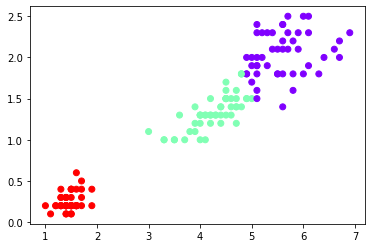

In [7]:
# Visualizing the output using matplotlib
plt.scatter(X[:,0],
            X[:,1],
            c=y_pred,
            cmap='rainbow')

### 7. Accuracy
<a id='7'></a>

In [8]:
# Replacing the '0' with '2' and vice versa,
# to match the label format of the y lables
twos = np.where(y_pred==2)
zero = np.where(y_pred==0)
y_pred[twos] = 0
y_pred[zero] = 2


print(f"Accuracy of the predictions: {accuracy_score(y, y_pred)*100}%")

Accuracy of the predictions: 96.0%
